In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
import numpy as np

from weavingspace import TileUnit
from weavingspace import Tiling

gpd.__version__

'0.10.2'

In [2]:
# w = gpd.read_file("anthromes/Anthromes-12k-DGG/an12_dgg_inputs/Anthromes-12k-DGG/an12_dgg_inputs.shp")
w = gpd.read_file("NACIS-2022/world-with-oceans-ee.gpkg")

In [3]:
unit = TileUnit(tiling_type = "hex-colouring", 
                #  Note these alternatives:
                #  tiling_type = "hex-dissection", 
                #  tiling_type = "hex-dissection", dissection_offset = 0,
                n = 3, crs = w.crs, 
                spacing = 500000).transform_rotate(15)
tiling = Tiling(unit, w, id_var = "NAME", tile_margin = 10000)

In [4]:
map = tiling.get_tiled_map(prioritise_tiles = False, ragged_edges = True)

c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


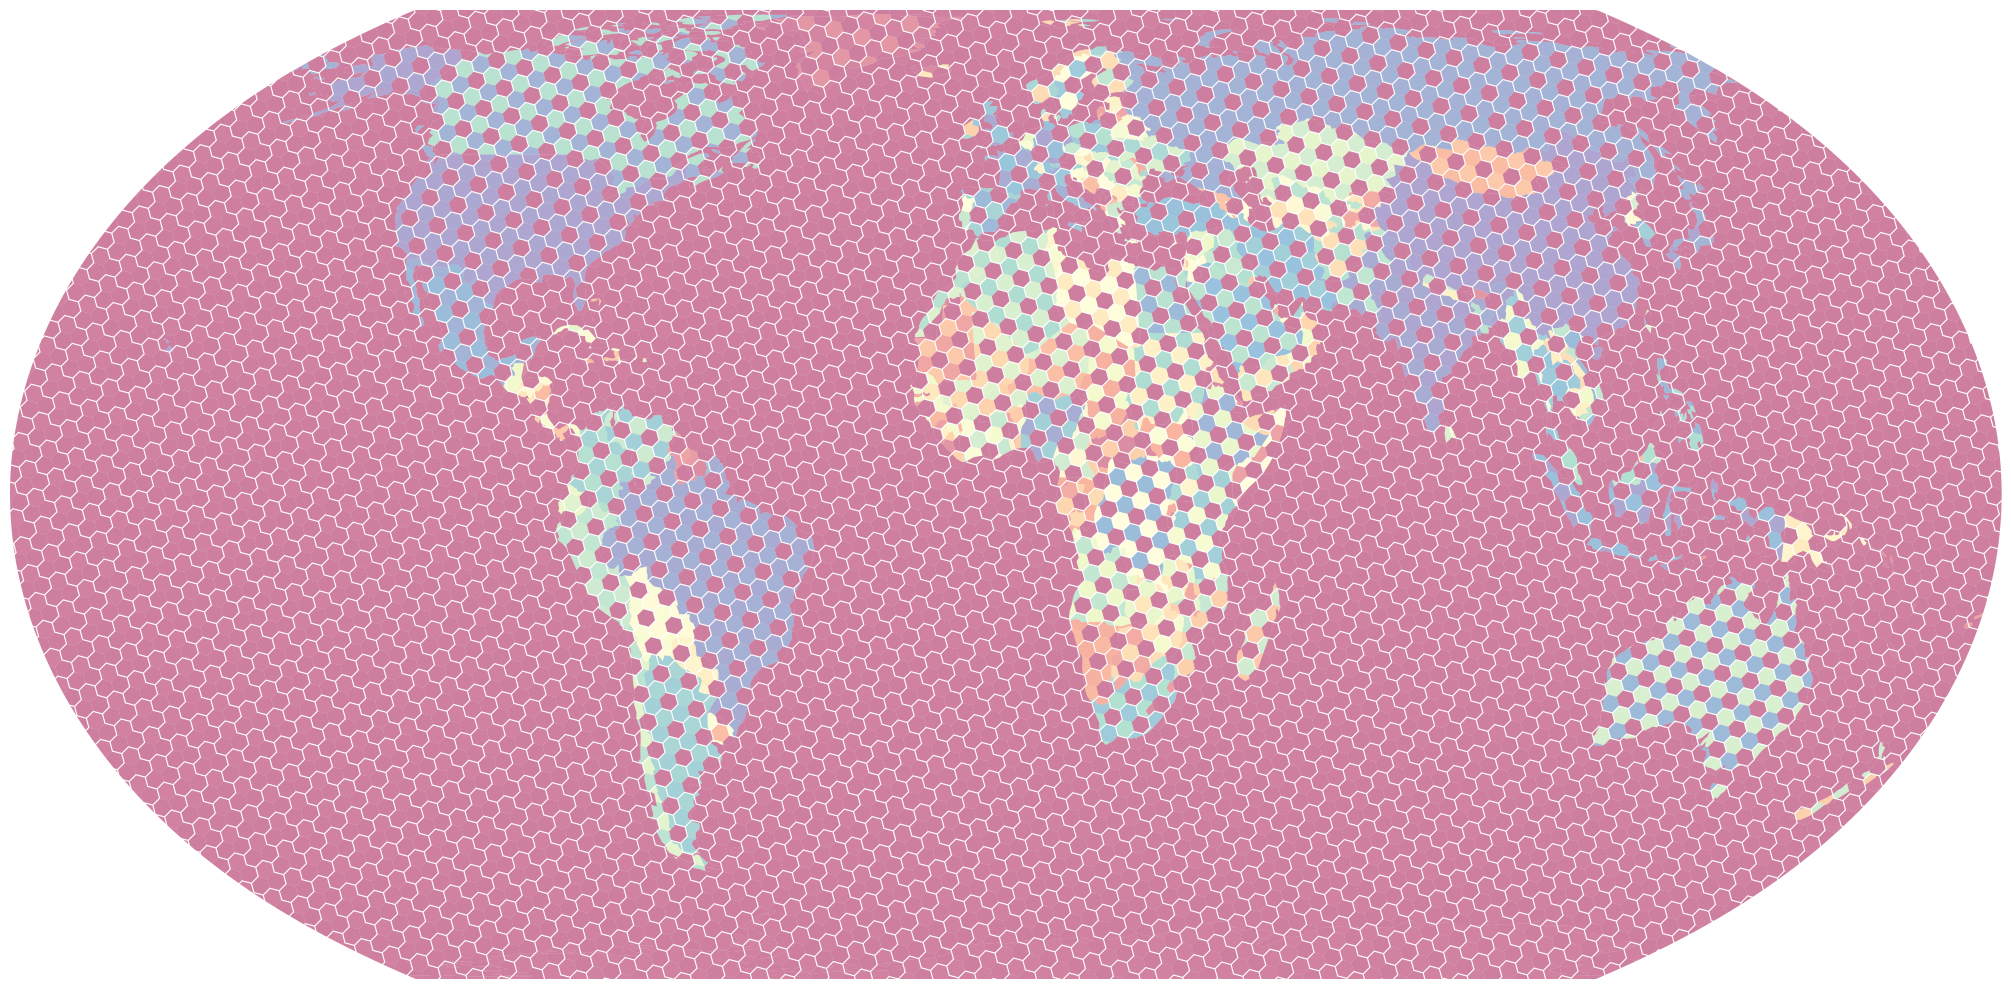

In [5]:
map.variables = dict(zip(list("abc"),
                        ("scalerank", "POP_EST", "GDP_MD")))
map.colourmaps = dict(zip(map.variables.values(), 
                         ("Spectral", "Spectral", "Spectral")))

fig = map.render(legend = False, scheme = "quantiles", alpha = 0.5) # quantiles for interest

c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


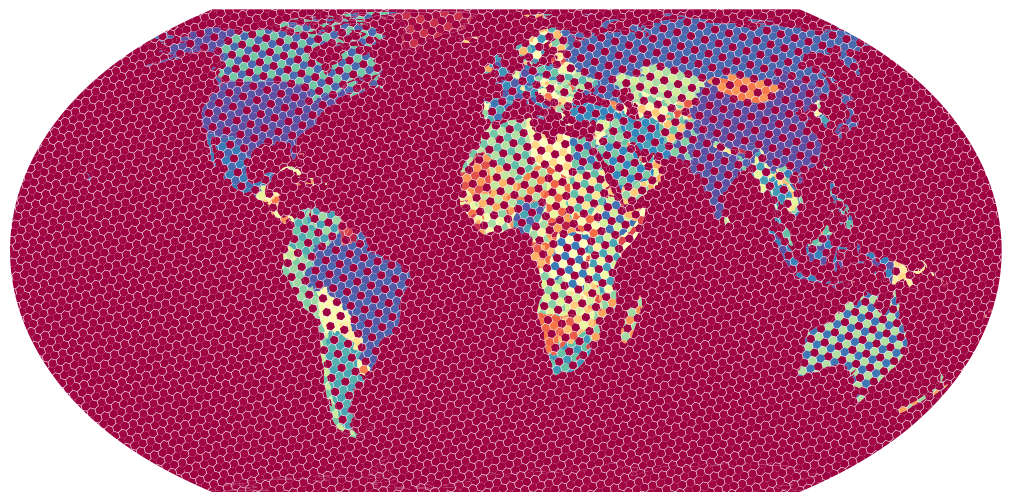

In [6]:
map.dpi = 600  # don't ask me what makes sense for DPI
map.figsize = (10, 7)

fig = map.render(legend = False, scheme = "quantiles")

In [7]:
fig.savefig("NACIS-2022/output/another-map.svg")

FileNotFoundError: [Errno 2] No such file or directory: 'NACIS-2022/output/another-map.svg'